In [1]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from gp.program import Program
from gp.selection import tournament_selection
from gp.variation import crossover

import matplotlib.pyplot as plt
import numpy as np
import tqdm
import random

In [2]:
# Dataset Generation
X = np.linspace(-np.pi, np.pi, 20).reshape(-1, 1)
print(X.shape)
y = np.sin(X)

(20, 1)


In [3]:
def pareto_front(candidates, X, y):
    def dominates(individual1, individual2):
        error1, complexity1 = mean_squared_error(individual1(X), y), individual1.complexity()
        error2, complexity2 = mean_squared_error(individual2(X), y), individual2.complexity()
        all_better_or_equal = (error1 <= error2 and complexity1 <= complexity2)
        strictly_better = (error1 < error2 or complexity1 < complexity2)
        return all_better_or_equal and strictly_better

    layers = []

    while candidates:
        current_layer = []
        for candidate in candidates:
            is_dominated = any(dominates(other, candidate) for other in candidates if str(other) != str(candidate))
            if not is_dominated:
                current_layer.append(candidate)
        layers.append(current_layer)
        candidates = [candidate for candidate in candidates if str(candidate) not in [str(x) for x in current_layer]]

    for layer in layers:
        archive.extend(layer)
        if len(archive) >= len(population) * 0.10:
            break

In [ ]:
num_generations = 30
num_cascades = 10
population_size = 500

# Population Generation
archive = []

for cascade in range(1, num_cascades+1):
    print("beginning cascade", cascade)

    population = [Program(num_features=1, num_outputs=1, depth=random.randint(3, 6)) for i in range(population_size)]

    for generation in tqdm.trange(num_generations):
        pareto_front(population, X, y)
        reproduced, crossed_over, mutated = [], [], []
        while len(crossed_over) < len(population):
            parent1 = tournament_selection(archive, X, y, tournament_size=4)
            parent2 = tournament_selection(population, X, y, tournament_size=4)
            child1, child2 = crossover(parent1, parent2)

            while child1.complexity() >= 400:
                child1, _ = crossover(parent1, parent2)
            while child2.complexity() >= 400:
                child2, _ = crossover(parent1, parent2)

            crossed_over.extend([child1, child2])
        population = reproduced + crossed_over

beginning cascade 1


  3%|▎         | 1/30 [01:13<35:37, 73.72s/it]

188
(mul (div (div (add X0 X0) 9.43) (add -7.46 9.53)) 2.85)

(div X0 (sub X0 -7.20))

(div 1.08 -6.43)

(sub X0 0.12)

(div X0 (add 8.54 X0))

(div X0 (add (div -9.56 -1.92) X0))

(div (sub X0 0.18) X0)

(add 1.27 -2.46)

(div X0 (sub (sub 5.11 X0) (div X0 5.17)))

(mul (div X0 6.31) (mul X0 X0))

(sub X0 (div X0 X0))

(add X0 X0)

(mul (sub X0 X0) (sub (sub X0 1.16) 9.48))

(mul (mul (sub X0 X0) 8.37) (mul X0 X0))

(div 1.08 -1.92)

(div X0 (add (div -9.56 -1.92) -1.95))

(mul (div (div (add X0 X0) (mul 8.94 1.15)) (add -7.46 9.53)) 2.85)

(mul (div (div (add X0 X0) 9.43) (add -7.46 9.53)) 2.85)

(div X0 (add 8.54 -6.12))

(mul (div (div (add X0 X0) 9.43) (add -7.46 9.53)) 2.85)

(mul (div (div (add X0 X0) 9.43) (add -7.46 9.53)) 2.85)

(mul (div (div (add X0 X0) (mul 8.94 1.15)) (add -7.46 9.53)) 2.85)

(div X0 2.85)

(mul (div (div (add X0 X0) (mul 8.94 1.15)) (add -7.46 9.53)) 2.85)

(mul (div (div (add X0 X0) 9.43) (add -7.46 9.53)) 2.85)

(div X0 2.85)

(mul (div (div (add X0 X0

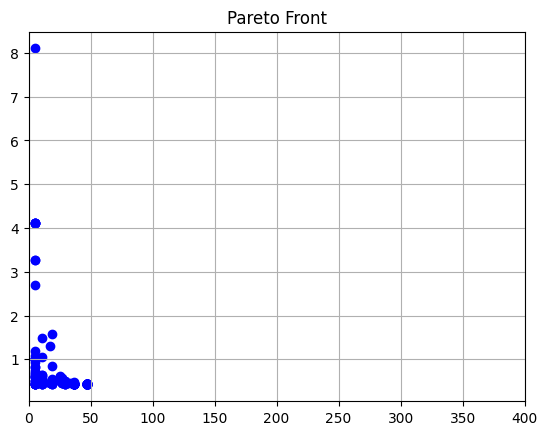

In [6]:
# Pareto Front
plt.title("Pareto Front")

print(len(archive))
for individual in archive:
    print(individual)
    complexity = individual.complexity()
    error = mean_squared_error(individual(X), y)
    print()
    plt.scatter(x=complexity, y=error, color='blue')
plt.grid()

plt.xlim(0, 400)
plt.show()

(mul (div (div (add X0 X0) (mul 9.53 1.15)) (add -7.46 9.53)) 2.85)


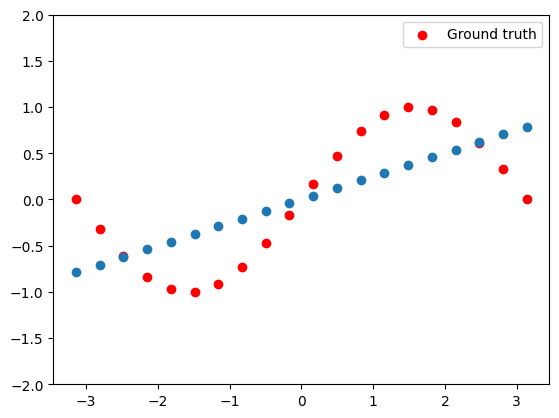

In [9]:
# Ground-truth function
plt.scatter(X, y, color='red', label='Ground truth')

# Sort programs by error
for solution in sorted(population, key=lambda program: mean_squared_error(program(X), y), reverse=False)[0:1]:
    print(solution)
    plt.scatter(X, solution(X))

plt.legend()
plt.ylim(-2, 2)
plt.show()